<a href="https://colab.research.google.com/github/rezakhaebar/cobagithub/blob/main/Startup%20Campus%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding

Predictive Maintenance Dataset (AI4I 2020) merupakan kumpulan data monitoring mesin yang dikumpulkan dari sebuah pabrik manufaktur selama satu tahun. Tujuan dari dataset ini adalah untuk membangun model prediksi yang dapat memprediksi kapan mesin akan mengalami kegagalan (failure) berdasarkan data monitoring mesin yang dikumpulkan. Dengan demikian, perusahaan dapat melakukan maintenance pada mesin dengan lebih efektif dan efisien, sehingga dapat mengurangi downtime dan biaya maintenance.

#Data Understanding

##Feature Description

- UDI (Unique Device Identifier) - Identifier unik untuk setiap unit produksi
- product ID - Identitas produk yang dihasilkan oleh unit produksi
- Type - Tipe produk yang dihasilkan oleh unit produksi
- Air temperature [K] - Suhu udara di sekitar unit produksi dalam Kelvin
- Process temperature [K] - Suhu proses produksi dalam Kelvin
- Rotational speed [rpm] - Kecepatan rotasi mesin dalam rpm
- Torque [Nm] - Torsi yang dihasilkan oleh mesin dalam Newton meter
- Tool wear [min] - Waktu pemakaian alat dalam menit
- Machine failure - Status kegagalan mesin, diidentifikasi sebagai 1 jika terjadi kegagalan dan 0 jika tidak terjadi kegagalan.
- TWF (Tool wear failure) - Status kegagalan mesin yang disebabkan oleh keausan alat, diidentifikasi sebagai 1 jika terjadi kegagalan dan 0 jika tidak terjadi kegagalan.
- HDF (Heat Dissipation Failure) - Status kegagalan mesin yang disebabkan oleh masalah dalam pembuangan panas atau pendinginan, diidentifikasi sebagai 1 jika terjadi kegagalan dan 0 jika tidak terjadi kegagalan.
- PWF (Power Failure) - Status kegagalan mesin yang disebabkan oleh masalah dalam pasokan daya, diidentifikasi sebagai 1 jika terjadi kegagalan dan 0 jika tidak terjadi kegagalan.
- OSF (Out of Specification Failure) - Status kegagalan mesin yang disebabkan oleh mesin yang tidak berada pada spesifikasi atau parameter operasional yang telah ditentukan, diidentifikasi sebagai 1 jika terjadi kegagalan dan 0 jika tidak terjadi kegagalan.
- RNF (Random Failure) - Status kegagalan mesin yang terjadi secara acak atau tidak terduga, tanpa disebabkan oleh faktor yang dapat diidentifikasi, diidentifikasi sebagai 1 jika terjadi kegagalan dan 0 jika tidak terjadi kegagalan.






In [ ]:
## import library
import pandas as pd
import numpy as np
import io
from google.colab import files

# Data exploration - graphical presentations and analysis
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, norm
from scipy import stats
import matplotlib.ticker as mtick
import plotly.express as px
from sklearn.preprocessing import LabelEncoder


#Additional
plt.rcParams['figure.figsize'] = 9, 6
%matplotlib inline

# Data Set

In [ ]:
df = pd.read_csv('/content/ai4i2020.csv')

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
# Set numeric columns dtype to float
df['Tool wear [min]'] = df['Tool wear [min]'].astype('float64')
df['Rotational speed [rpm]'] = df['Rotational speed [rpm]'].astype('float64')

In [ ]:
# rename dataset columns
df.rename(columns = {'Air temperature [K]':'Air temperature',
                     'Process temperature [K]':'Process temperature',
                     'Rotational speed [rpm]':'Rotational speed',
                     'Torque [Nm]':'Torque',
                     'Tool wear [min]':'Tool wear'},
          inplace = True)

In [ ]:
# drop UDI and Product ID columns
df.drop(['UDI'], axis=1, inplace = True)

In [ ]:
failure_type = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
failure_column = df[df['Machine failure'] == 1].drop(['Type','Air temperature','Process temperature','Rotational speed','Torque','Tool wear'],axis=1)
failure_column

,Product ID,Machine failure,TWF,HDF,PWF,OSF,RNF
50,L47230,1,0,0,1,0,0
69,L47249,1,0,0,1,1,0
77,L47257,1,1,0,0,0,0
160,L47340,1,0,0,0,1,0
161,L47341,1,0,0,0,1,0
...,...,...,...,...,...,...,...
9758,L56938,1,1,0,0,0,0
9764,L56944,1,0,0,1,0,0
9822,L57002,1,0,0,0,1,0
9830,L57010,1,0,0,0,1,0


In [ ]:
# menghitung jumlah setiap jenis kegagalan
result = df.groupby(['Machine failure','TWF', 'HDF', 'PWF', 'OSF', 'RNF']).size().reset_index(name='Count')
result

,Machine failure,TWF,HDF,PWF,OSF,RNF,Count
0,0,0,0,0,0,0,9643
1,0,0,0,0,0,1,18
2,1,0,0,0,0,0,9
3,1,0,0,0,1,0,78
4,1,0,0,1,0,0,80
5,1,0,0,1,1,0,11
6,1,0,1,0,0,0,106
7,1,0,1,0,1,0,6
8,1,0,1,1,0,0,3
9,1,1,0,0,0,0,42


Terdapat beberapa mesin yang memiliki lebih dari 1 kerusakan.

Terdapat beberapa ambiguitas pada data tersebut. Pertama ditemukan sebanyak 18 baris dimana nilai `Machine failure = 0` tetapi nilai `RNF = 1` juga . Lalu, ditemukan juga sebanyak 9 baris dimana nilai `Machine failure = 1 ` tetapi tidak ditemukan kolom yang bernilai `1` di kolom `TWF`, `HDF`, `PWF`, `OSF`, dan `RNF`. Kita akan mengatasi ambiguitas tersebut dengan menghapus baris-baris tersebut


In [ ]:
df = df.drop(df[(df['Machine failure'] == 0) & (df['RNF'] == 1)].index)

In [ ]:
df = df.drop(df.loc[(df['Machine failure'] == 1) & (df[failure_type].eq(0)).all(axis=1)].index)

# PPT

## TWF

In [ ]:
twf = df[df['TWF'] == 1]
twf

,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
77,L47257,L,298.8,308.9,1455.0,41.3,208.0,1,1,0,0,0,0
1087,H30501,H,296.9,307.8,1549.0,35.8,206.0,1,1,0,0,0,0
1509,L48689,L,298.0,308.5,1429.0,37.7,220.0,1,1,0,0,0,0
1682,H31096,H,297.9,307.4,1604.0,36.1,225.0,1,1,0,0,0,0
1763,L48943,L,298.2,307.6,1511.0,31.0,209.0,1,1,0,0,0,0
1996,M16856,M,298.4,308.0,1416.0,38.2,198.0,1,1,0,0,0,0
2166,M17026,M,299.6,309.2,1867.0,23.4,225.0,1,1,0,0,0,0
2244,M17104,M,299.3,308.4,1542.0,37.5,203.0,1,1,0,0,0,0
2671,M17531,M,299.7,309.3,1399.0,41.9,221.0,1,1,0,0,0,0
2864,H32278,H,300.6,309.4,1380.0,47.6,246.0,1,1,0,0,0,0


In [ ]:
sampel_twf = df[df['Product ID'] == 1]
sampel_twf

,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
77,L47257,L,298.8,308.9,1455.0,41.3,208.0,1,1,0,0,0,0
1087,H30501,H,296.9,307.8,1549.0,35.8,206.0,1,1,0,0,0,0
1509,L48689,L,298.0,308.5,1429.0,37.7,220.0,1,1,0,0,0,0
1682,H31096,H,297.9,307.4,1604.0,36.1,225.0,1,1,0,0,0,0
1763,L48943,L,298.2,307.6,1511.0,31.0,209.0,1,1,0,0,0,0


In [ ]:
twf.describe()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.0,46.0,46.0,46.000000,46.000000,46.000000
mean,300.297826,310.165217,1566.173913,37.836957,216.369565,1.0,1.0,0.0,0.021739,0.065217,0.021739
std,1.945992,1.484021,205.768511,10.277232,12.257168,0.0,0.0,0.0,0.147442,0.249637,0.147442
min,296.900000,307.400000,1323.000000,16.200000,198.000000,1.0,1.0,0.0,0.000000,0.000000,0.000000
25%,298.650000,308.975000,1423.750000,30.625000,207.000000,1.0,1.0,0.0,0.000000,0.000000,0.000000
50%,300.450000,310.250000,1516.000000,37.750000,214.500000,1.0,1.0,0.0,0.000000,0.000000,0.000000
75%,301.775000,311.225000,1625.500000,45.075000,224.250000,1.0,1.0,0.0,0.000000,0.000000,0.000000
max,304.400000,313.700000,2271.000000,65.300000,253.000000,1.0,1.0,0.0,1.000000,1.000000,1.000000


## HDF

In [ ]:
hdf = df[df['HDF'] == 1]
hdf

,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
3236,M18096,M,300.8,309.4,1342.0,62.4,113.0,1,0,1,0,0,0
3760,L50940,L,302.3,310.9,1377.0,46.8,166.0,1,0,1,0,0,0
3787,L50967,L,302.3,310.8,1377.0,47.3,22.0,1,0,1,0,0,0
3793,L50973,L,302.3,310.9,1379.0,49.3,34.0,1,0,1,0,0,0
3806,M18666,M,302.3,310.9,1360.0,44.0,67.0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4833,L52013,L,303.4,311.9,1377.0,41.6,34.0,1,0,1,0,0,0
4836,L52016,L,303.3,311.8,1315.0,62.0,42.0,1,0,1,0,0,0
4840,L52020,L,303.4,311.9,1298.0,63.9,59.0,1,0,1,0,0,0
4844,M19704,M,303.4,311.8,1316.0,50.9,69.0,1,0,1,0,0,0


In [ ]:
sampel_hdf = df[df['HDF'] == 1].head(5)
sampel_hdf

,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
3236,M18096,M,300.8,309.4,1342.0,62.4,113.0,1,0,1,0,0,0
3760,L50940,L,302.3,310.9,1377.0,46.8,166.0,1,0,1,0,0,0
3787,L50967,L,302.3,310.8,1377.0,47.3,22.0,1,0,1,0,0,0
3793,L50973,L,302.3,310.9,1379.0,49.3,34.0,1,0,1,0,0,0
3806,M18666,M,302.3,310.9,1360.0,44.0,67.0,1,0,1,0,0,0


In [ ]:
hdf.describe()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.0,115.0,115.0,115.000000,115.000000,115.0
mean,302.560870,310.788696,1337.260870,53.166957,107.191304,1.0,0.0,1.0,0.026087,0.052174,0.0
std,0.601853,0.644513,34.745967,6.223494,63.629257,0.0,0.0,0.0,0.160092,0.223351,0.0
min,300.800000,309.400000,1212.000000,41.600000,2.000000,1.0,0.0,1.0,0.000000,0.000000,0.0
25%,302.100000,310.300000,1319.000000,48.200000,57.000000,1.0,0.0,1.0,0.000000,0.000000,0.0
50%,302.500000,310.700000,1346.000000,52.600000,106.000000,1.0,0.0,1.0,0.000000,0.000000,0.0
75%,303.050000,311.300000,1363.500000,57.050000,161.000000,1.0,0.0,1.0,0.000000,0.000000,0.0
max,303.700000,312.200000,1379.000000,68.200000,229.000000,1.0,0.0,1.0,1.000000,1.000000,0.0


## PWF

In [ ]:
pwf = df[df['PWF'] == 1]
pwf

,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
50,L47230,L,298.9,309.1,2861.0,4.6,143.0,1,0,0,1,0,0
69,L47249,L,298.9,309.0,1410.0,65.7,191.0,1,0,0,1,1,0
168,L47348,L,298.4,308.3,1433.0,62.3,20.0,1,0,0,1,0,0
194,M15054,M,298.2,308.5,2678.0,10.7,86.0,1,0,0,1,0,0
207,M15067,M,298.4,308.7,1421.0,60.7,119.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9084,L56264,L,297.2,307.9,1326.0,75.4,172.0,1,0,0,1,1,0
9175,L56355,L,297.8,309.0,1403.0,64.2,0.0,1,0,0,1,0,0
9613,L56793,L,299.0,310.2,1377.0,62.5,92.0,1,0,0,1,0,0
9764,L56944,L,298.5,309.5,1294.0,66.7,12.0,1,0,0,1,0,0


In [ ]:
sampel_pwf = df[df['PWF'] == 1].head(5)
sampel_pwf

,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
50,L47230,L,298.9,309.1,2861.0,4.6,143.0,1,0,0,1,0,0
69,L47249,L,298.9,309.0,1410.0,65.7,191.0,1,0,0,1,1,0
168,L47348,L,298.4,308.3,1433.0,62.3,20.0,1,0,0,1,0,0
194,M15054,M,298.2,308.5,2678.0,10.7,86.0,1,0,0,1,0,0
207,M15067,M,298.4,308.7,1421.0,60.7,119.0,1,0,0,1,0,0


In [ ]:
pwf.describe()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.0,95.000000,95.000000,95.0,95.000000,95.0
mean,300.075789,309.954737,1763.968421,48.514737,101.884211,1.0,0.010526,0.031579,1.0,0.126316,0.0
std,2.147127,1.600450,620.829138,26.788653,64.355704,0.0,0.102598,0.175804,0.0,0.333967,0.0
min,295.700000,306.200000,1200.000000,3.800000,0.000000,1.0,0.000000,0.000000,1.0,0.000000,0.0
25%,298.400000,308.700000,1312.500000,12.800000,50.500000,1.0,0.000000,0.000000,1.0,0.000000,0.0
50%,300.400000,310.200000,1386.000000,63.600000,100.000000,1.0,0.000000,0.000000,1.0,0.000000,0.0
75%,301.800000,311.000000,2563.500000,68.400000,150.000000,1.0,0.000000,0.000000,1.0,0.000000,0.0
max,304.000000,313.200000,2886.000000,76.600000,234.000000,1.0,1.000000,1.000000,1.0,1.000000,0.0


## OSF

In [ ]:
osf = df[df['OSF'] == 1]
osf

,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
69,L47249,L,298.9,309.0,1410.0,65.7,191.0,1,0,0,1,1,0
160,L47340,L,298.4,308.2,1282.0,60.7,216.0,1,0,0,0,1,0
161,L47341,L,298.3,308.1,1412.0,52.3,218.0,1,0,0,0,1,0
242,L47422,L,298.0,308.2,1348.0,58.8,202.0,1,0,0,0,1,0
248,L47428,L,298.0,308.3,1362.0,56.8,216.0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9664,L56844,L,299.1,310.2,1317.0,54.8,231.0,1,0,0,0,1,0
9667,L56847,L,299.2,310.3,1352.0,48.9,238.0,1,0,0,0,1,0
9822,L57002,L,298.5,309.4,1360.0,60.9,187.0,1,0,0,0,1,0
9830,L57010,L,298.3,309.3,1337.0,56.1,206.0,1,0,0,0,1,0


In [ ]:
sampel_osf = df[df['OSF'] == 1].head()
sampel_osf

,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
69,L47249,L,298.9,309.0,1410.0,65.7,191.0,1,0,0,1,1,0
160,L47340,L,298.4,308.2,1282.0,60.7,216.0,1,0,0,0,1,0
161,L47341,L,298.3,308.1,1412.0,52.3,218.0,1,0,0,0,1,0
242,L47422,L,298.0,308.2,1348.0,58.8,202.0,1,0,0,0,1,0
248,L47428,L,298.0,308.3,1362.0,56.8,216.0,1,0,0,0,1,0


In [ ]:
osf.describe()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.0,98.000000,98.000000,98.000000,98.0,98.0
mean,300.044898,310.073469,1350.326531,58.370408,207.693878,1.0,0.030612,0.061224,0.122449,1.0,0.0
std,2.028565,1.511028,61.250841,5.943587,15.811002,0.0,0.173150,0.240974,0.329489,0.0,0.0
min,295.600000,306.100000,1181.000000,46.300000,172.000000,1.0,0.000000,0.000000,0.000000,1.0,0.0
25%,298.425000,308.725000,1313.000000,53.825000,197.000000,1.0,0.000000,0.000000,0.000000,1.0,0.0
50%,300.050000,310.100000,1360.500000,57.700000,207.000000,1.0,0.000000,0.000000,0.000000,1.0,0.0
75%,301.675000,311.175000,1382.250000,61.675000,216.000000,1.0,0.000000,0.000000,0.000000,1.0,0.0
max,304.000000,313.100000,1515.000000,75.400000,253.000000,1.0,1.000000,1.000000,1.000000,1.0,0.0


## Scalling

In [ ]:
features = [col for col in df.columns
            if df[col].dtype=='float64']

In [ ]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[features] = sc.fit_transform(df[features])

In [ ]:
sampelscale_twf = df[df['TWF'] == 1].head(7)
sampelscale_twf

,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
77,L47257,L,-0.601495,-0.744148,-0.467624,0.132547,1.572432,1,1,0,0,0,0
1087,H30501,H,-1.551282,-1.485579,0.056336,-0.419312,1.541008,1,1,0,0,0,0
1509,L48689,L,-1.001405,-1.013759,-0.612549,-0.228670,1.760974,1,1,0,0,0,0
1682,H31096,H,-1.051394,-1.755190,0.362908,-0.389211,1.839534,1,1,0,0,0,0
1763,L48943,L,-0.901428,-1.620385,-0.155478,-0.900935,1.588143,1,1,0,0,0,0
1996,M16856,M,-0.801450,-1.350773,-0.685011,-0.178501,1.415312,1,1,0,0,0,0
2166,M17026,M,-0.201584,-0.541939,1.828879,-1.663504,1.839534,1,1,0,0,0,0


In [ ]:
sampelscale_twf.describe()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.0,7.0,7.0,7.0,7.0
mean,-0.872863,-1.215968,0.046780,-0.521084,1.650991,1.0,1.0,0.0,0.0,0.0,0.0
std,0.416097,0.458802,0.870982,0.592630,0.163786,0.0,0.0,0.0,0.0,0.0,0.0
min,-1.551282,-1.755190,-0.685011,-1.663504,1.415312,1.0,1.0,0.0,0.0,0.0,0.0
25%,-1.026400,-1.552982,-0.540086,-0.660124,1.556720,1.0,1.0,0.0,0.0,0.0,0.0
50%,-0.901428,-1.350773,-0.155478,-0.389211,1.588143,1.0,1.0,0.0,0.0,0.0,0.0
75%,-0.701473,-0.878954,0.209622,-0.203585,1.800254,1.0,1.0,0.0,0.0,0.0,0.0
max,-0.201584,-0.541939,1.828879,0.132547,1.839534,1.0,1.0,0.0,0.0,0.0,0.0


# Data Prepocessing

## Missing Data

In [ ]:
#mengecek missing data
df.isnull().sum()

Type                   0
Air temperature        0
Process temperature    0
Rotational speed       0
Torque                 0
Tool wear              0
Machine failure        0
TWF                    0
HDF                    0
PWF                    0
OSF                    0
RNF                    0
dtype: int64

## Duplicate data

In [ ]:
#mengecek data duplikasi
df.duplicated().sum()

0

## Checking Outliers

In [ ]:
numerical_df = df.select_dtypes(include=[np.number]).drop(['TWF','HDF','PWF','OSF','RNF'],axis=1)

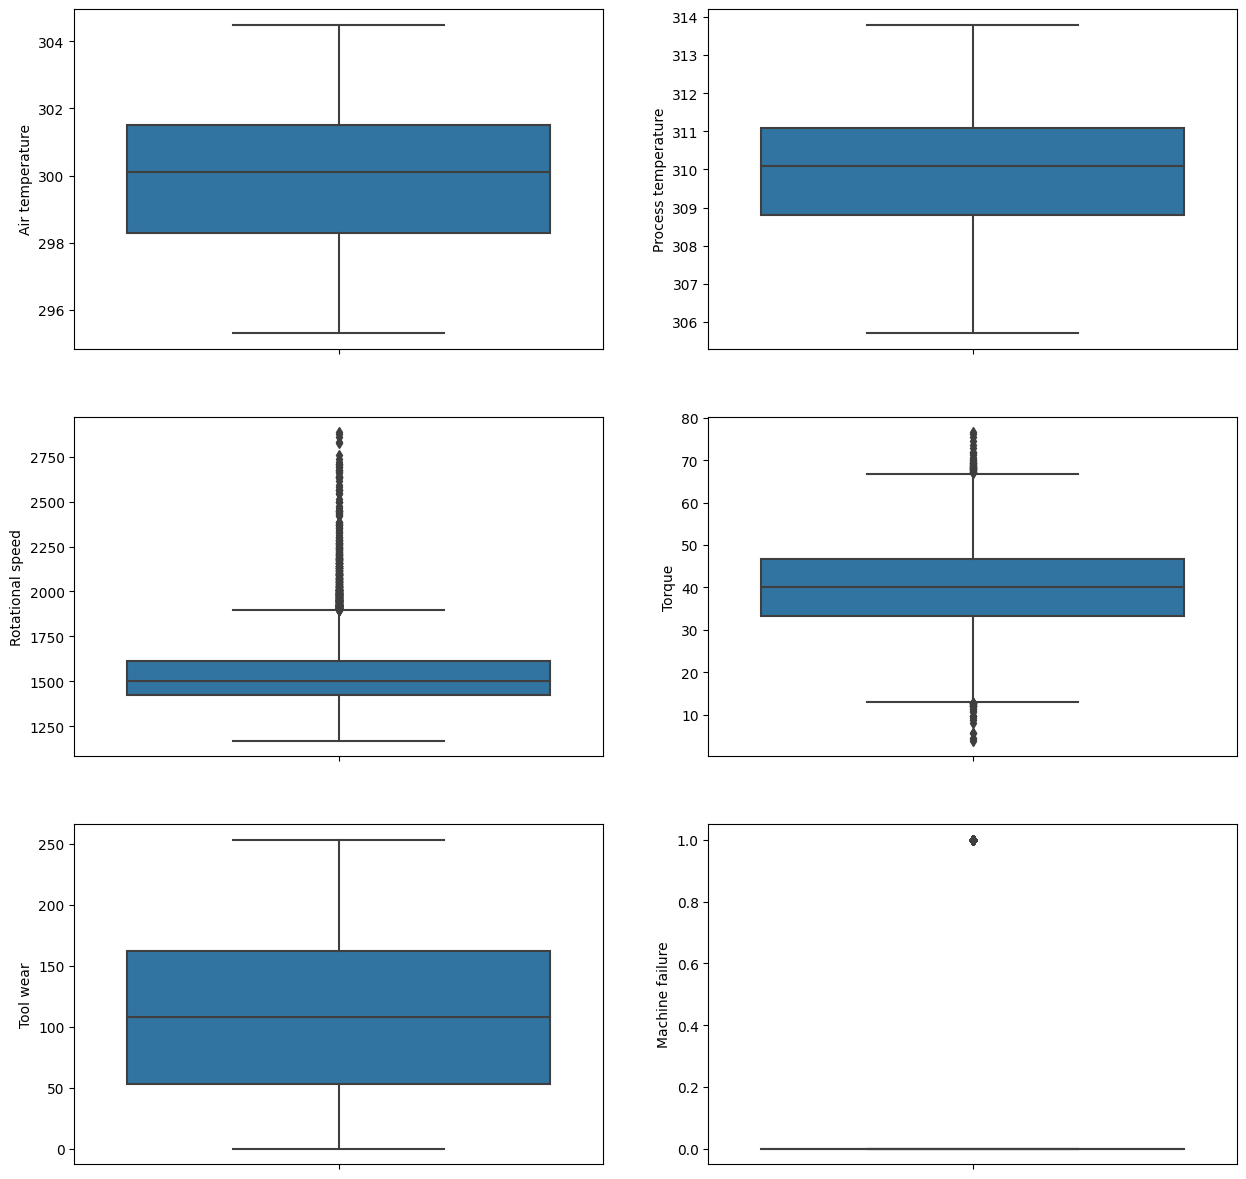

In [ ]:
plt.figure(figsize = (15,15))
for i,col in enumerate(numerical_df.select_dtypes('number').columns):
    plt.subplot(3,2,i+1)
    sns.boxplot(y = col,data = numerical_df)
plt.show()

***
**Insight**
***

Terlihat pada boxplot di atas bahwa terdapat outliers yaitu pada variable Rotational speed dan Torque sehingga kita harus melakukan dropping pada outliers tersebut.

### Check outliers Rotational speed

Text(0.5, 1.0, 'Rotational speed Outliers')

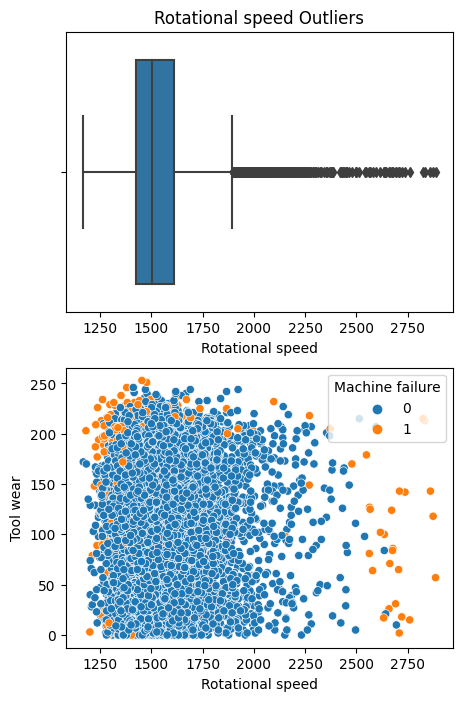

In [ ]:
# fitur rotasi mesin
fig, axs = plt.subplots(2, 1, figsize = (5, 8))

# tampilkan visualisasi
sns.boxplot(ax = axs[0], x = df.iloc[:, 3])
sns.scatterplot(ax = axs[1],
                data = df,
                x = 'Rotational speed',
                y = 'Tool wear',
                hue = 'Machine failure')
axs[0].set_title('Rotational speed Outliers')

### Check outliers Torque

Text(0.5, 1.0, 'Torque Outliers')

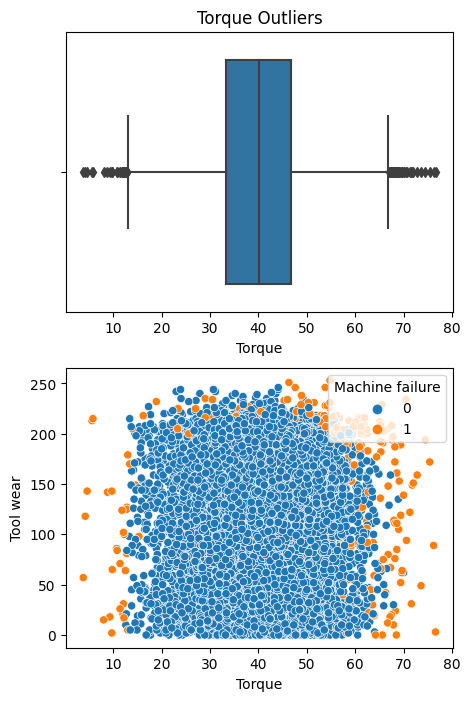

In [ ]:
# fitur torsi
fig, axs = plt.subplots(2, 1, figsize = (5, 8))

# tampilkan visualisasi
sns.boxplot(ax = axs[0], x = df.iloc[:, 4])
sns.scatterplot(ax = axs[1],
                data = df,
                x = 'Torque',
                y = 'Tool wear',
                hue = 'Machine failure')
axs[0].set_title('Torque Outliers')

# Data Explorations

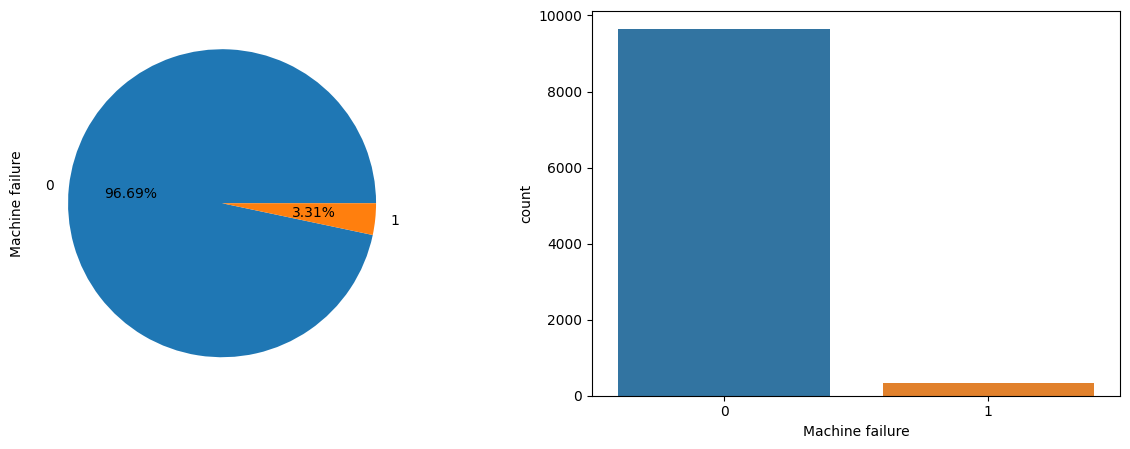

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
df['Machine failure'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.subplot(1,2,2)
sns.countplot(x = 'Machine failure', data = df)
plt.show()

***
**Insight**
***

Dari output di atas dapat dilihat bahwa jumlah kejadian ketidakgagalan mesin (nilai 0) lebih tinggi dibandingkan dengan jumlah kejadian kegagalan mesin (nilai 1) hal ini menunjukkan bahwa adanya imbalance data.

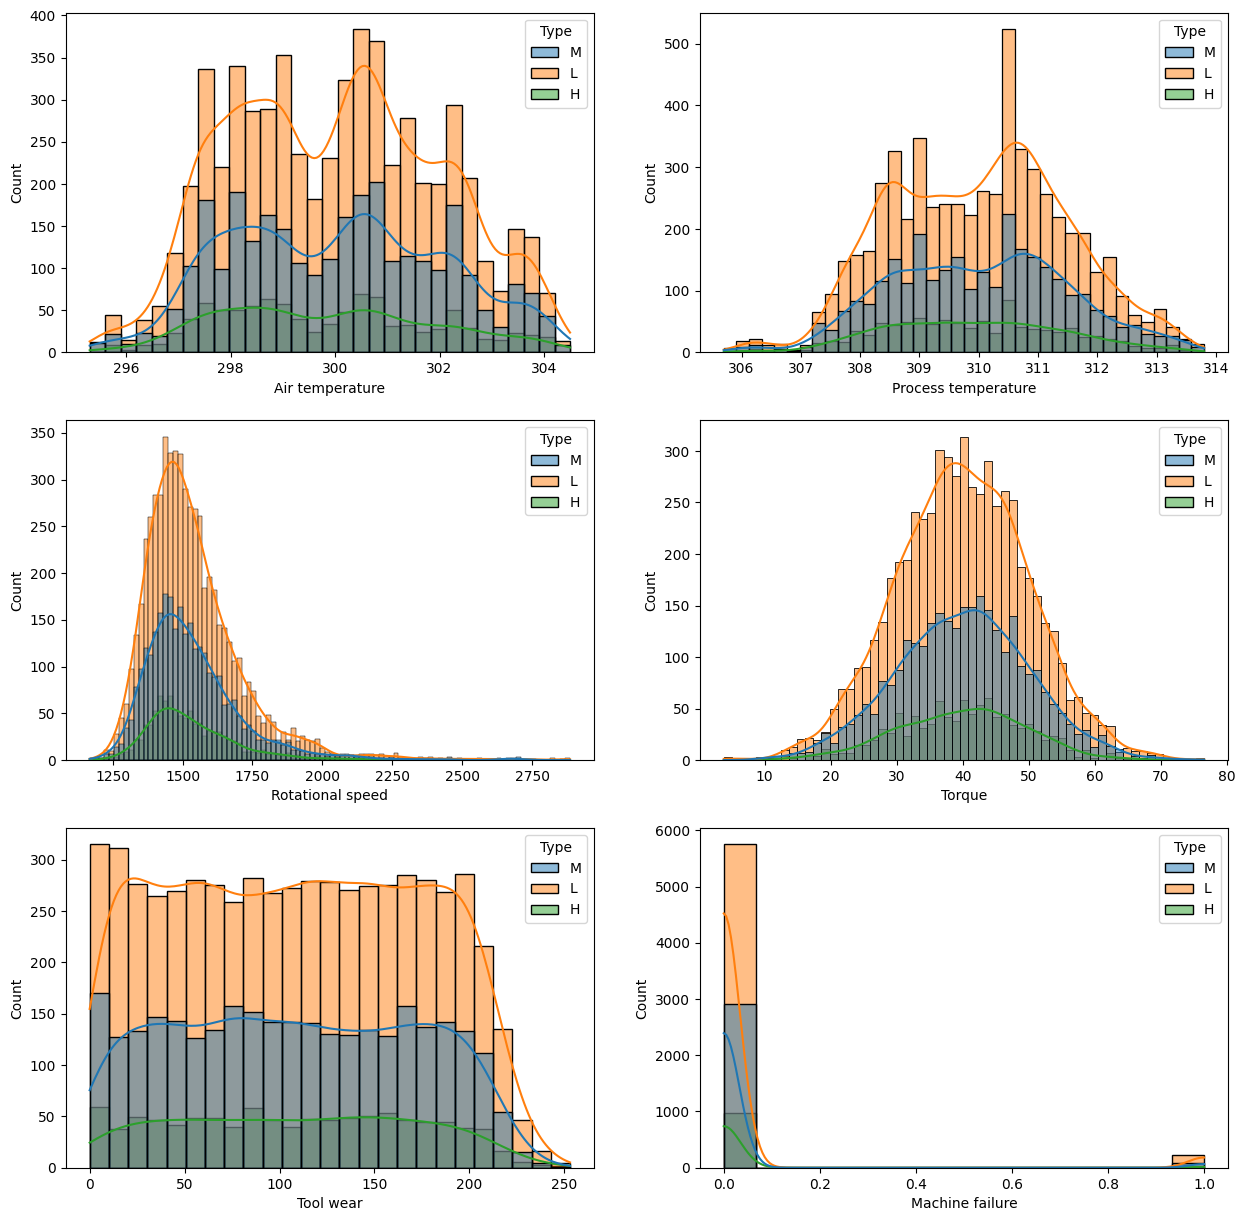

In [ ]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_df.columns):
    plt.subplot(3, 2, i + 1)
    sns.histplot(x=col, data=df, kde=True, hue='Type')
plt.show()

In [ ]:
skewness = {}
for i in ['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear']:
    skewness[i] = round(df[i].skew(), 2)

skew_df = pd.DataFrame.from_dict(skewness, orient='index', columns=['Skewness'])
skew_df

,Skewness
Air temperature,0.12
Process temperature,0.02
Rotational speed,1.99
Torque,-0.01
Tool wear,0.03


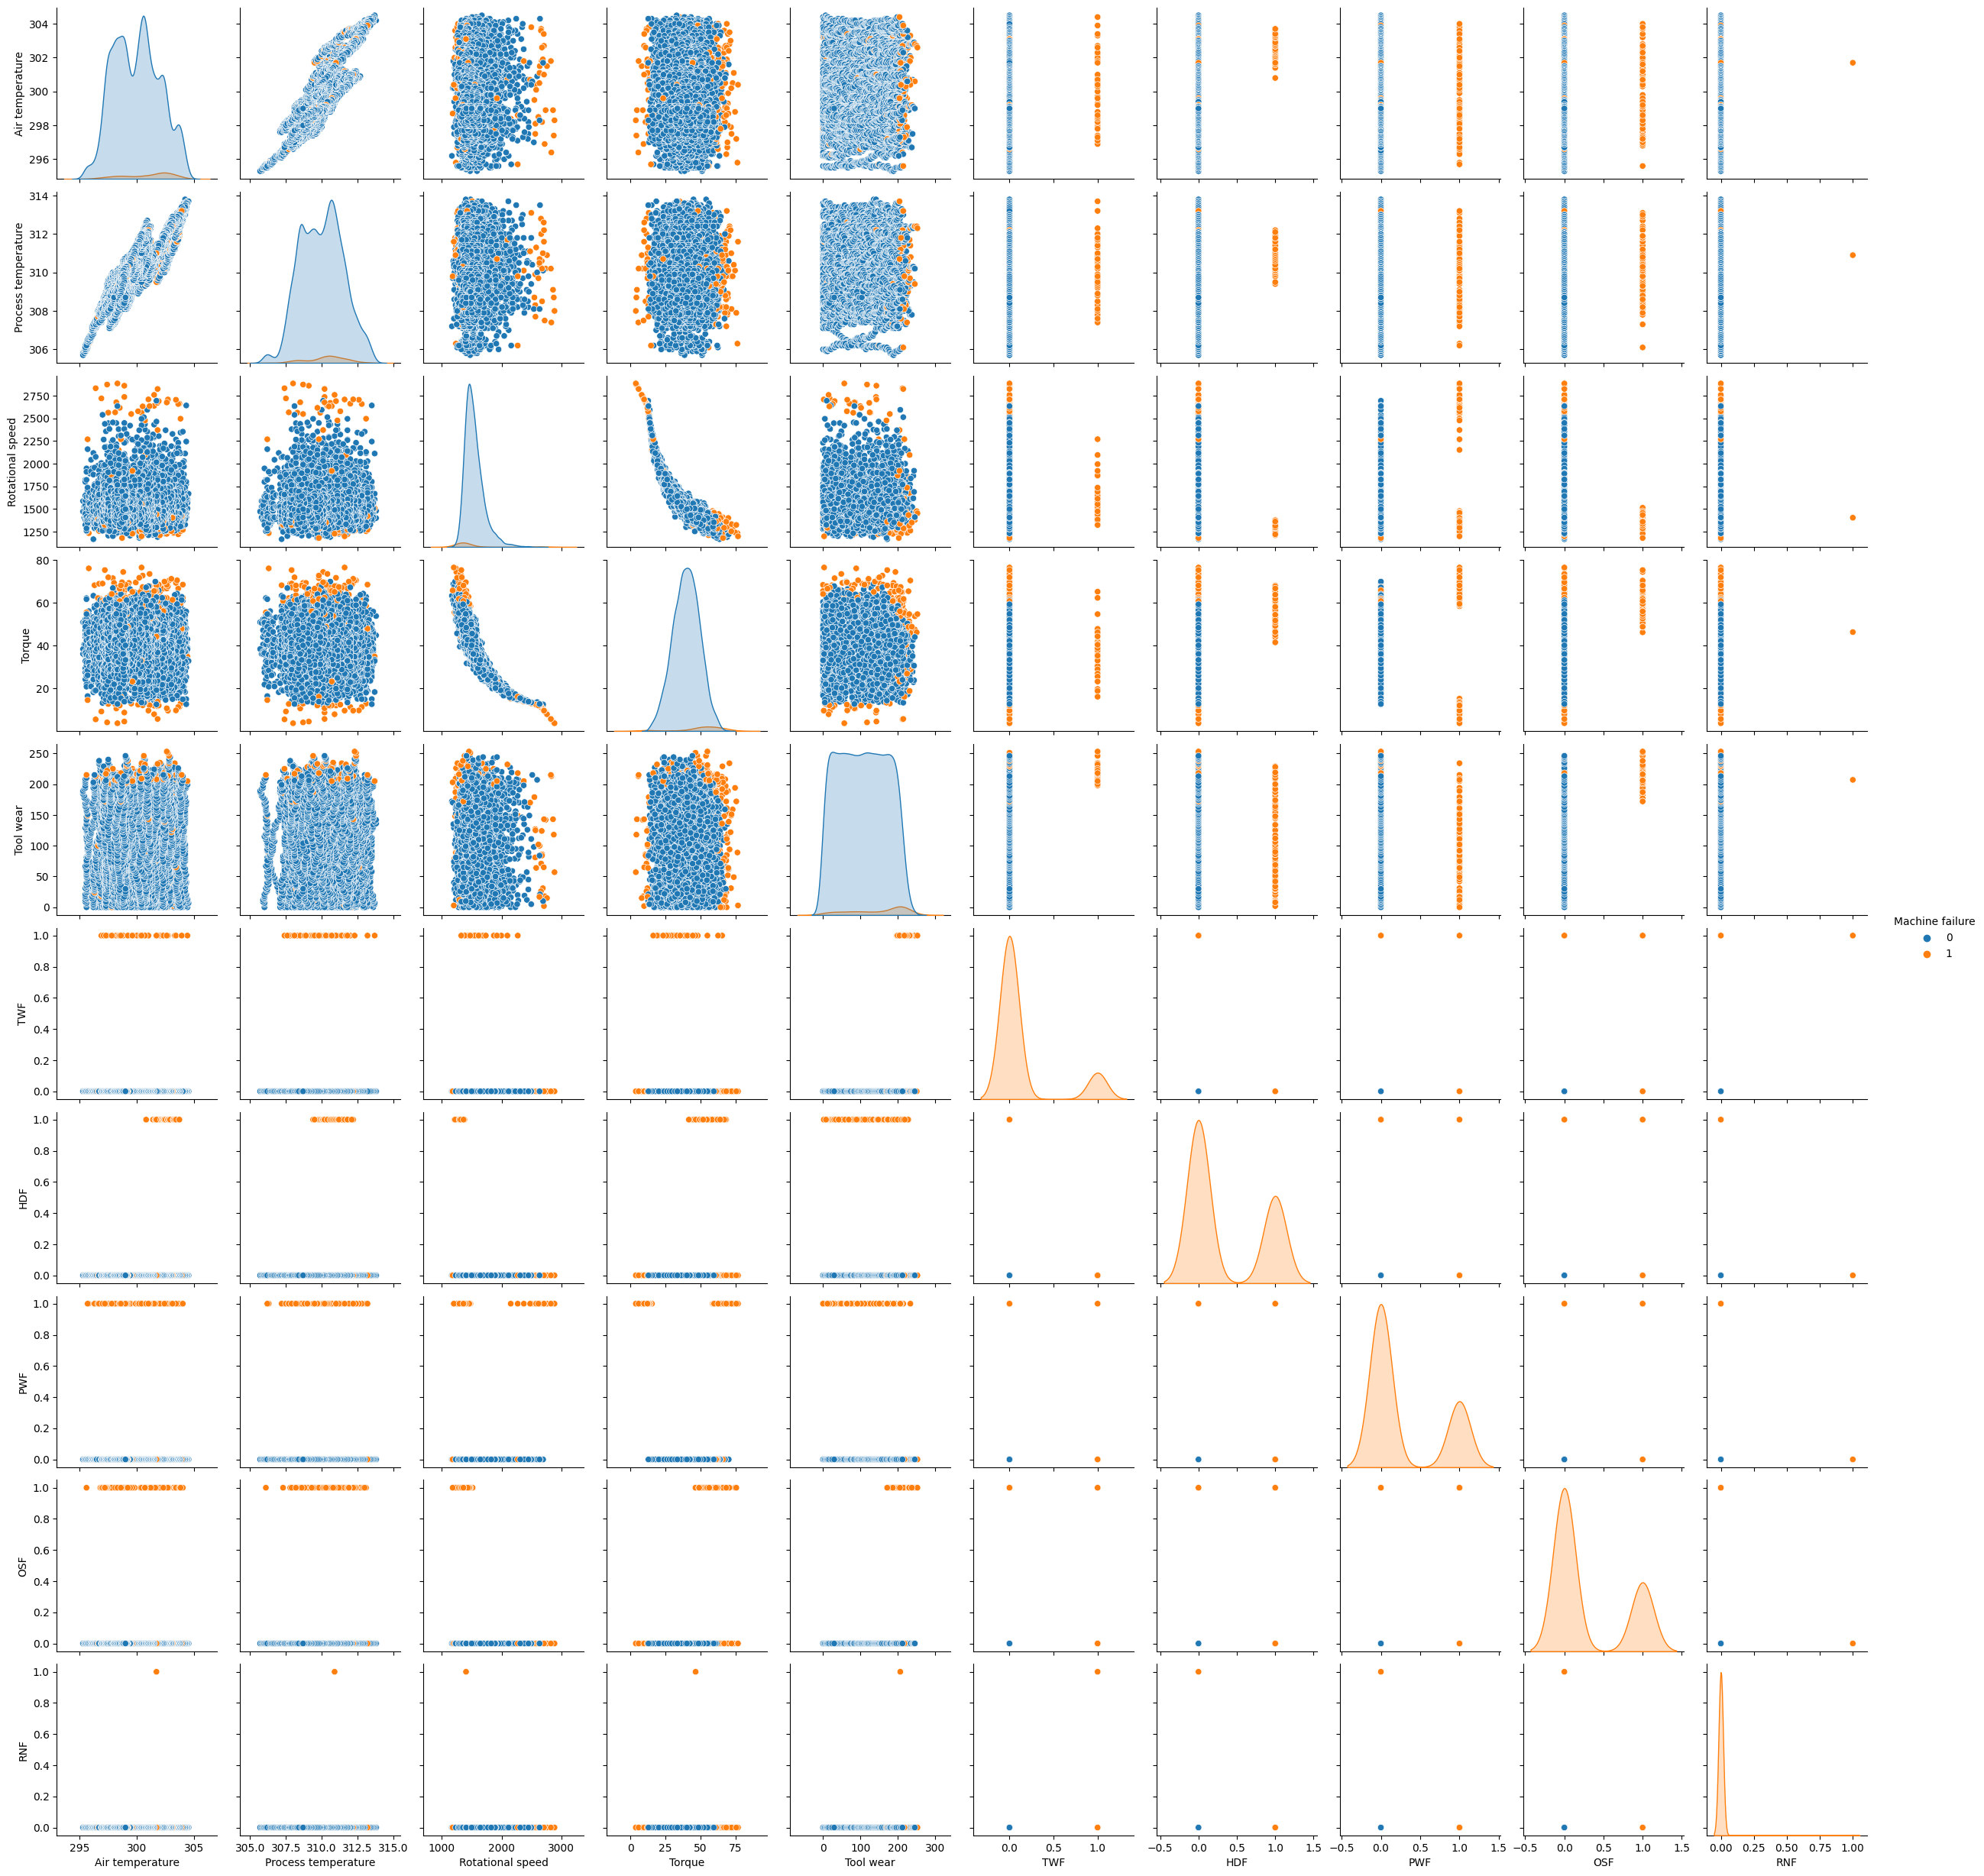

In [ ]:
sns.pairplot(df, hue = 'Machine failure')
plt.show()

***
**Insight**
***

- Torque dan rotational speed memiliki korelasi yang tinggi.

- Process temperature dan air temperature juga memiliki korelasi yang tinggi.

- Titik oren menandakan bahwa failure terjadi pada nilai ekstrem beberapa feature.

# Descriptive Statistics

In [ ]:
df.describe()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
count,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000
mean,300.003259,310.004031,1538.893212,39.978993,107.921087,0.033089,0.004612,0.011531,0.009526,0.009827,0.000100
std,2.000548,1.483692,179.412171,9.966805,63.649152,0.178879,0.067762,0.106768,0.097139,0.098646,0.010014
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.700000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df[df['Machine failure'] == 1].describe()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.0,330.000000,330.000000,330.000000,330.000000,330.000000
mean,300.901515,310.292727,1496.181818,50.399394,144.506061,1.0,0.139394,0.348485,0.287879,0.296970,0.003030
std,2.073226,1.369004,389.590780,16.457729,72.939549,0.0,0.346883,0.477214,0.453462,0.457617,0.055048
min,295.600000,306.100000,1181.000000,3.800000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,299.100000,309.500000,1326.000000,46.300000,85.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,301.600000,310.400000,1363.500000,53.850000,167.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,302.500000,311.200000,1416.000000,61.275000,208.000000,1.0,0.000000,1.000000,1.000000,1.000000,0.000000
max,304.400000,313.700000,2886.000000,76.600000,253.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Engineering

In [ ]:
df = df.drop(['TWF','HDF','PWF','OSF','RNF'],axis=1)

In [ ]:
type_dict = {'L': 0, 'M': 1, 'H': 2}
# Encoding
df['Type'].replace(to_replace=type_dict, inplace=True)
df['Type'] = df['Type'].astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 9973 non-null   float64
 1   Air temperature      9973 non-null   float64
 2   Process temperature  9973 non-null   float64
 3   Rotational speed     9973 non-null   float64
 4   Torque               9973 non-null   float64
 5   Tool wear            9973 non-null   float64
 6   Machine failure      9973 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 623.3 KB


In [ ]:
df.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure
0,1.0,298.1,308.6,1551.0,42.8,0.0,0
1,0.0,298.2,308.7,1408.0,46.3,3.0,0
2,0.0,298.1,308.5,1498.0,49.4,5.0,0
3,0.0,298.2,308.6,1433.0,39.5,7.0,0
4,0.0,298.2,308.7,1408.0,40.0,9.0,0


In [ ]:
features = [col for col in df.columns
            if df[col].dtype=='float64']

In [ ]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[features] = sc.fit_transform(df[features])

# Correlation Between Features

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=len(features))
X_pca = pd.DataFrame(data=pca.fit_transform(df[features]), columns=['PC'+str(i+1) for i in range(len(features))])
var_exp = pd.Series(data=100*pca.explained_variance_ratio_, index=['PC'+str(i+1) for i in range(len(features))])
print('Explained variance ratio per component:', round(var_exp,2), sep='\n')
print('Explained variance ratio with 3 components: '+str(round(var_exp.values[:3].sum(),2)))

Explained variance ratio per component:
PC1    31.88
PC2    30.65
PC3    16.75
PC4    16.57
PC5     2.11
PC6     2.04
dtype: float64
Explained variance ratio with 3 components: 79.28


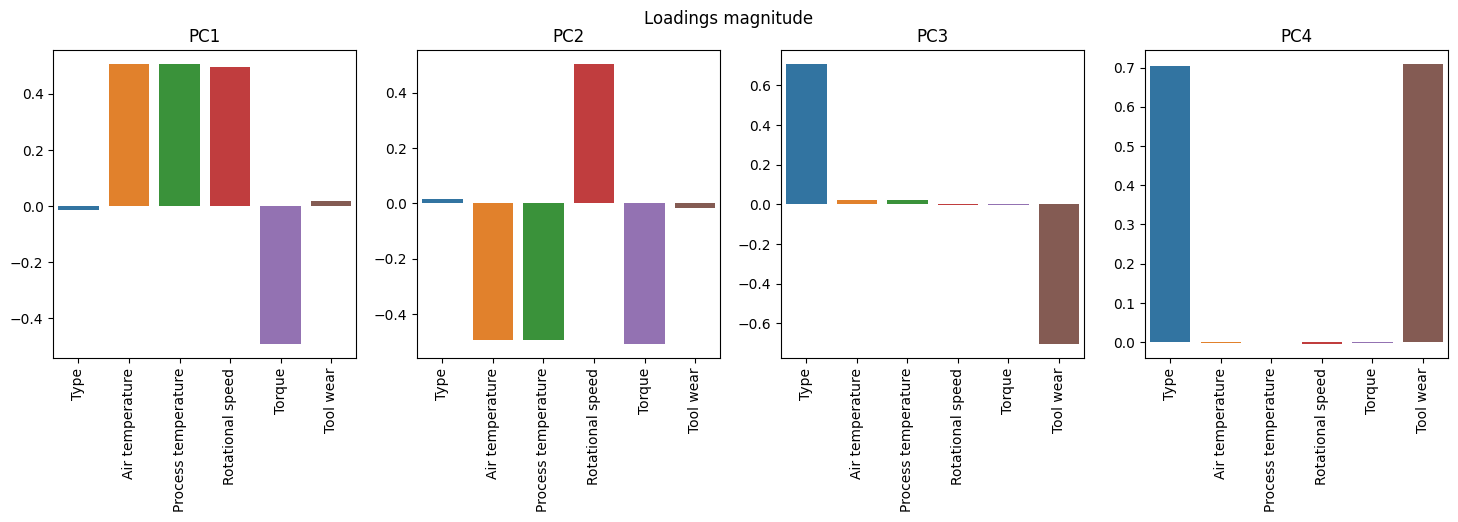

In [ ]:
# PCA for Data visualization
pca3 = PCA(n_components=4)
X_pca3 = pd.DataFrame(data=pca3.fit_transform(df[features]), columns=['PC1','PC2','PC3','PC4'])

# Loadings Analysis
fig, axs = plt.subplots(ncols=4, figsize=(18,4))
fig.suptitle('Loadings magnitude')
pca_loadings = pd.DataFrame(data=pca3.components_, columns=features)
for j in range(4):
    ax = axs[j]
    sns.barplot(ax=ax, x=pca_loadings.columns, y=pca_loadings.values[j])
    ax.tick_params(axis='x', rotation=90)
    ax.title.set_text('PC'+str(j+1))
plt.show()

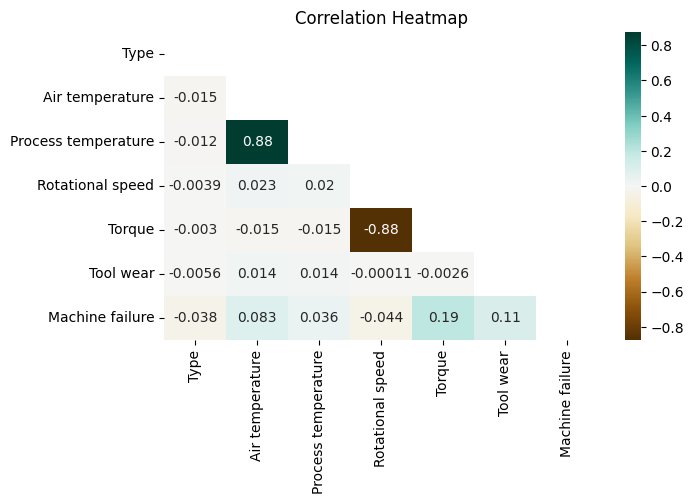

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(7,4))
sns.heatmap(data=df.corr(), mask=np.triu(df.corr()), annot=True, cmap='BrBG')
plt.title('Correlation Heatmap')
plt.show()

***
**Insight**
***

Dari output correlation heatmap di atas menunjukkan :
- Feature process temperature memiliki hubungan positif yang sangat kuat dengan feature air temperature dibuktikan dengan nilainya 0.88 yaitu mendekati 1.  Artinya, ketika suhu proses meningkat, suhu udara juga cenderung meningkat secara proporsional.
- Feature Torque juga memiliki hubungan negatif yang sangat kuat dengan rotational speed dibuktikan dengan angka -0.89 yaitu mendekati -1.  Hal ini menunjukkan bahwa peningkatan nilai Torque cenderung berhubungan dengan penurunan nilai rotational speed pada situasi tertentu.
- Feature machine failure memiliki hubungan positif dengan Torque, yang artinya peningkatan Torque pada mesin mungkin menghasilkan tekanan atau beban yang lebih besar pada komponen mesin. Jika komponen tersebut tidak mampu menangani beban yang lebih tinggi secara efektif, kemungkinan terjadinya kegagalan mesin meningkat. Juga memiliki hubungan yang negatif dengan rotational speed yang artinya mesin dengan kecepatan putaran yang lebih rendah atau penurunan kecepatan putaran dapat menjadi indikasi adanya masalah atau kegagalan yang berpotensi terjadi pada mesin.

# Modelling

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Machine failure'], axis=1)
y = df["Machine failure"]

In [ ]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
X_train.shape

(7978, 6)

In [ ]:
y_train.shape

(7978,)

Karena data imbalance, kita akan melakukan oversampling pada training set

In [ ]:
from imblearn.over_sampling import SMOTE, SVMSMOTE,RandomOverSampler
oversamp = SMOTE(random_state=42)

In [ ]:
X_train, y_train = oversamp.fit_resample(X_train, y_train)

In [ ]:
X_train.shape

(15428, 6)

In [ ]:
y_train.shape

(15428,)

# Compare and Contrast Model

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, fbeta_score
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, make_scorer
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve
from sklearn.inspection import permutation_importance
import time

In [ ]:
def eval_preds(model, X, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    f2 = fbeta_score(y_test, y_pred, pos_label=1, beta=2)
    metrics = pd.Series(data={'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1 Score': f1, 'F2 Score': f2})
    metrics = round(metrics, 3)
    return cm, metrics

In [ ]:
def fit_models(clf, clf_str, X_train, X_test, y_train, y_test):
    metrics = pd.DataFrame(columns=clf_str)
    for model, model_name in zip(clf, clf_str):
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        metrics[model_name] = eval_preds(model, X_test, y_test, y_test_pred)[1]
    return metrics

In [ ]:
def predict_and_evaluate(clf, X, y_test, clf_str):
    cm_dict = {key: np.nan for key in clf_str}
    metrics = pd.DataFrame(columns=clf_str)
    y_pred = pd.DataFrame(columns=clf_str)
    for fit_model, model_name in zip(clf, clf_str):
        # Metrics
        y_pred[model_name] = fit_model.predict(X)
        cm, scores = eval_preds(fit_model, X, y_test, y_pred[model_name])
        # Update Confusion matrix and metrics
        cm_dict[model_name] = cm
        metrics[model_name] = scores
    return y_pred, cm_dict, metrics

In [ ]:
def print_classification_reports(clf, X, y_test, clf_str):
    for fit_model, model_name in zip(clf, clf_str):
            y_pred = fit_model.predict(X)
            report = classification_report(y_test, y_pred)
            print(f"Classification Report for {model_name}:")
            print(report)
            print("------------------------------------------------------")

In [ ]:
def plot_roc_curves(clf, X, y_test, clf_str):
    plt.figure(figsize=(10, 6))
    for fit_model, model_name in zip(clf, clf_str):
        if hasattr(fit_model, "predict_proba"):
            y_scores = fit_model.predict_proba(X)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_scores)
            roc_auc = roc_auc_score(y_test, y_scores)
            plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.3f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic")
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
def plot_precision_recall_curves(clf, X, y_test, clf_str):
    plt.figure(figsize=(10, 6))
    for fit_model, model_name in zip(clf, clf_str):
        if hasattr(fit_model, "predict_proba"):
            y_scores = fit_model.predict_proba(X)[:, 1]
            precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
            average_precision = average_precision_score(y_test, y_scores)
            plt.plot(recall, precision, label=f"{model_name} (AP = {average_precision:.3f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend(loc="lower right")
    plt.show()

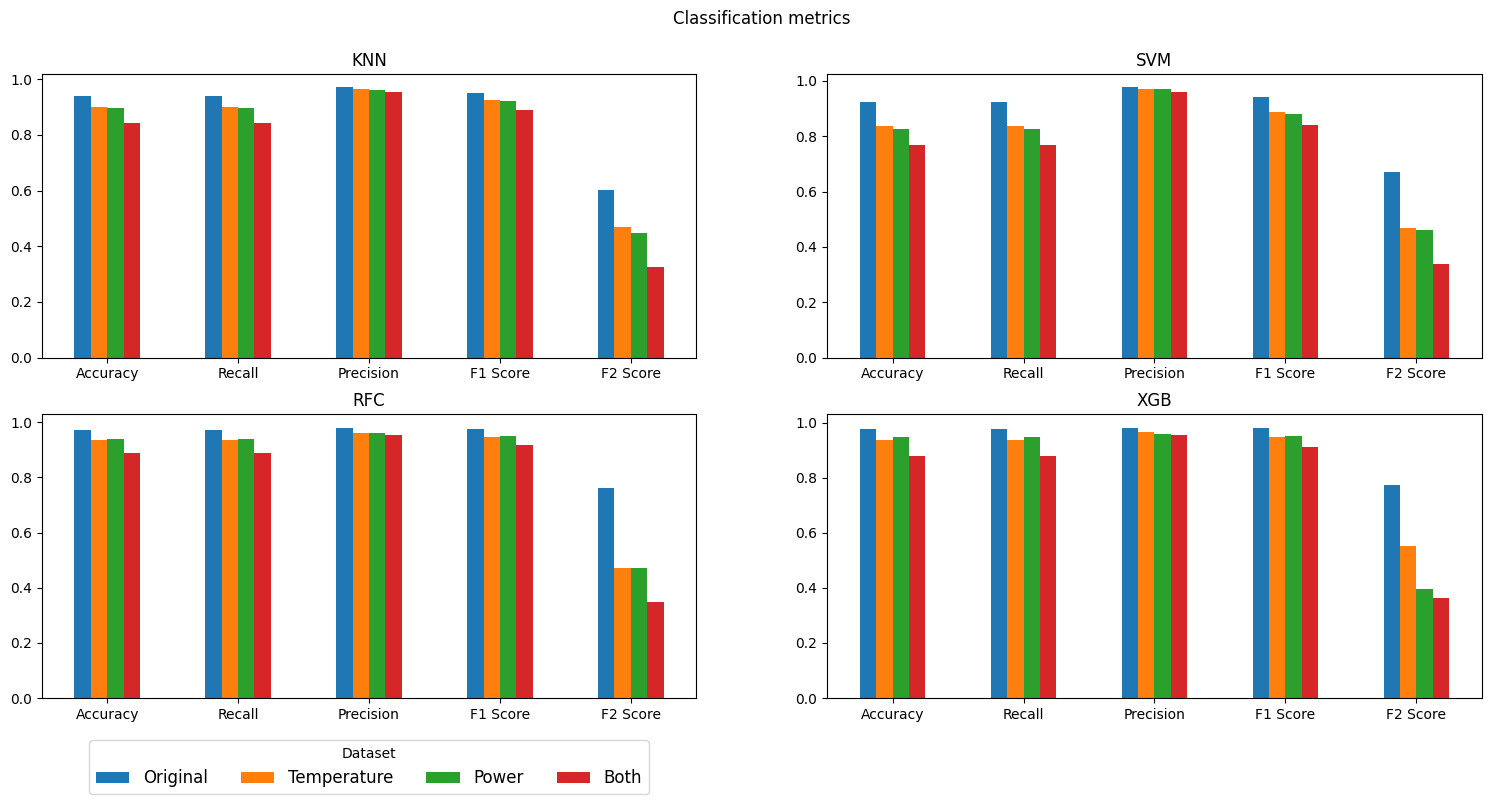

In [ ]:
# Models
knn = KNeighborsClassifier()
svm = SVC(probability=True)
rfc = RandomForestClassifier()
xgb = XGBClassifier()

clf = [knn,svm,rfc,xgb]
clf_str = ['KNN','SVM','RFC','XGB']

# Fit on raw train
metrics_0 = fit_models(clf,clf_str,X_train,X_test,y_train,y_test)

# Fit on temperature product train
XX_train = X_train.drop(columns=['Process temperature','Air temperature'])
XX_test = X_test.drop(columns=['Process temperature','Air temperature'])
XX_train['Temperature']= X_train['Process temperature']*X_train['Air temperature']
XX_test['Temperature']= X_test['Process temperature']*X_test['Air temperature']
metrics_1 = fit_models(clf,clf_str,XX_train,XX_test,y_train,y_test)

# Fit on power product train
XX_train = X_train.drop(columns=['Rotational speed','Torque'])
XX_test = X_test.drop(columns=['Rotational speed','Torque'])
XX_train['Power'] = X_train['Rotational speed']*X_train['Torque']
XX_test['Power'] = X_test['Rotational speed']*X_test['Torque']
metrics_2 = fit_models(clf,clf_str,XX_train,XX_test,y_train,y_test)

# Fit on both products train
XX_train = X_train.drop(columns=['Process temperature','Air temperature','Rotational speed','Torque'])
XX_test = X_test.drop(columns=['Process temperature','Air temperature','Rotational speed','Torque'])
XX_train['Temperature']= X_train['Process temperature']*X_train['Air temperature']
XX_test['Temperature']= X_test['Process temperature']*X_test['Air temperature']
XX_train['Power'] = X_train['Rotational speed']*X_train['Torque']
XX_test['Power'] = X_test['Rotational speed']*X_test['Torque']
metrics_3 = fit_models(clf,clf_str,XX_train,XX_test,y_train,y_test)

# classification metrics barplot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18,8))
fig.suptitle('Classification metrics')
for j, model in enumerate(clf_str):
    ax = axs[j//2,j-2*(j//2)]
    model_metrics = pd.DataFrame(data=[metrics_0[model],metrics_1[model],metrics_2[model],metrics_3[model]])
    model_metrics.index = ['Original','Temperature','Power','Both']
    model_metrics.transpose().plot(ax=ax, kind='bar', rot=0, )
    ax.title.set_text(model)
    ax.get_legend().remove()
fig.subplots_adjust(top=0.9, left=0.1, right=0.9, bottom=0.12)
axs.flatten()[-2].legend(title='Dataset', loc='upper center',
                         bbox_to_anchor=(0.5, -0.12), ncol=4, fontsize=12)
plt.show()

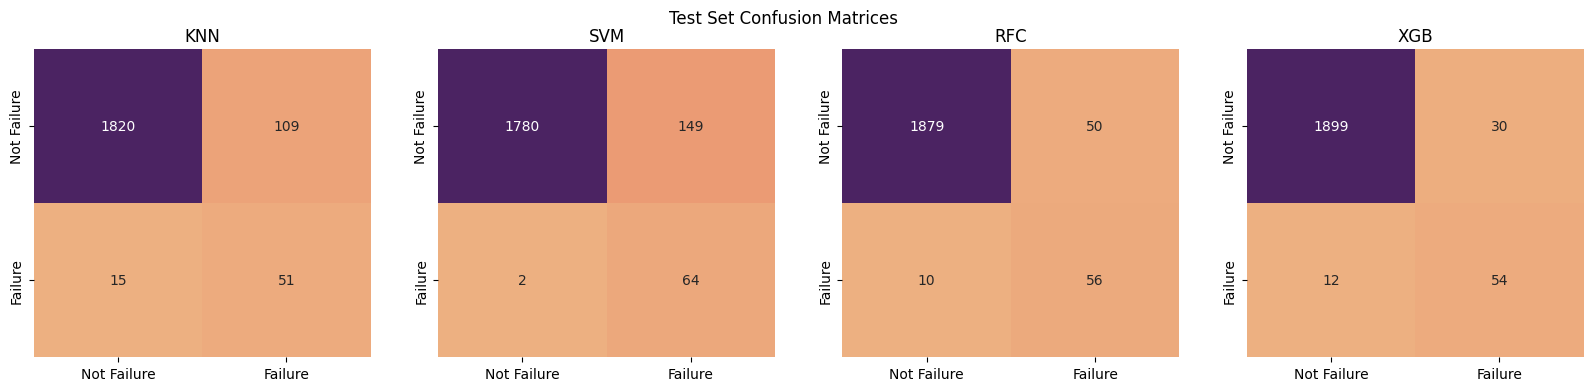


Test scores:
             KNN    SVM    RFC    XGB
Accuracy   0.938  0.924  0.970  0.979
Recall     0.938  0.924  0.970  0.979
Precision  0.970  0.976  0.979  0.982
F1 Score   0.950  0.943  0.973  0.980
F2 Score   0.601  0.671  0.757  0.776


In [ ]:
# Models
metrics_0 = fit_models(clf,clf_str,X_train,X_test,y_train,y_test)

# Create evaluation metrics
y_pred_test, cm_dict_test, metrics_test = predict_and_evaluate(
    clf,X_test,y_test,clf_str)

# Show Test Confusion Matrices
cm_labels = ['Not Failure', 'Failure']
fig, axs = plt.subplots(ncols=4, figsize=(20,4))
fig.suptitle('Test Set Confusion Matrices')
for j, model_name in enumerate(clf_str):
    ax = axs[j]
    sns.heatmap(ax=ax, data=cm_dict_test[model_name], annot=True,
                fmt='d', cmap='flare', cbar=False)
    ax.title.set_text(model_name)
    ax.set_xticklabels(cm_labels)
    ax.set_yticklabels(cm_labels)
plt.show()

# Print scores
print('')
print('Test scores:', metrics_test, sep='\n')

In [ ]:
print_classification_reports(clf, X_test, y_test, clf_str)

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1929
           1       0.32      0.77      0.45        66

    accuracy                           0.94      1995
   macro avg       0.66      0.86      0.71      1995
weighted avg       0.97      0.94      0.95      1995

------------------------------------------------------
Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1929
           1       0.30      0.97      0.46        66

    accuracy                           0.92      1995
   macro avg       0.65      0.95      0.71      1995
weighted avg       0.98      0.92      0.94      1995

------------------------------------------------------
Classification Report for RFC:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1929
           1       0.53      0.85 

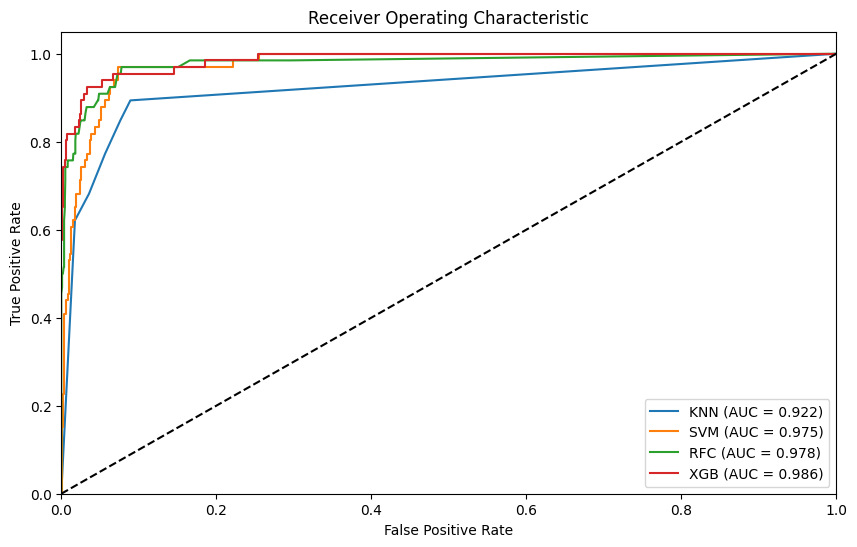

In [ ]:
plot_roc_curves(clf, X_test, y_test, clf_str)

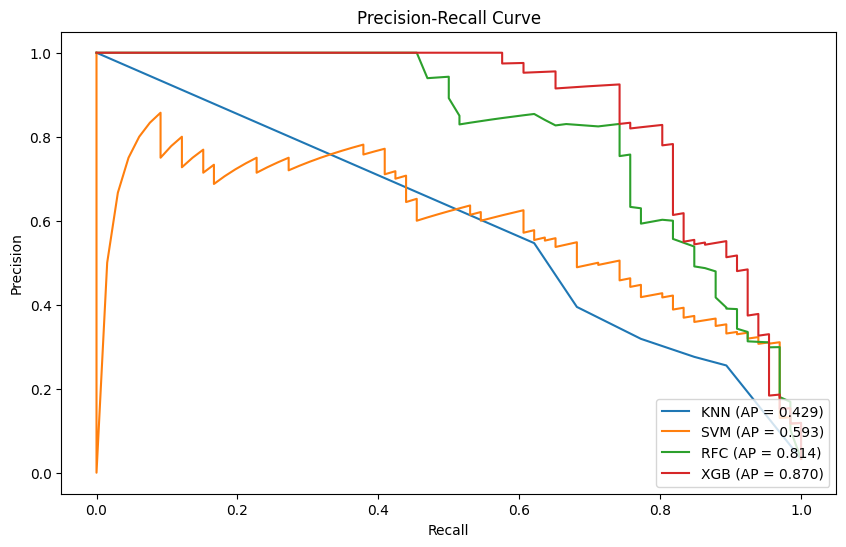

In [ ]:
plot_precision_recall_curves(clf, X_test, y_test, clf_str)

# Selected Model : XGB

In [ ]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
f2 = fbeta_score(y_test, y_pred, pos_label=1, beta=2)

rows = ['Accuracy', 'Recall', 'Precision', 'F1 Score', 'F2 Score']
score = [acc, recall, precision, f1, f2]
eval = pd.DataFrame(rows, columns=['evaluation'])
eval['score'] = pd.DataFrame(score)
eval.head()

,evaluation,score
0,Accuracy,0.978947
1,Recall,0.978947
2,Precision,0.982113
3,F1 Score,0.980161
4,F2 Score,0.775862


***
**Insight**
***

Model Extreme Gradient Boosting yang digunakan memberikan hasil yang bagus. Model memiliki tingkat akurasi sebesar 98%, yang berarti model ini mampu melakukan prediksi dengan tingkat kebenaran yang tinggi. Model ini juga memiliki tingkat kepresisian (precision) sebesar 99% untuk kasus tidak ada kegagalan mesin (kelas 0) dan 61% untuk kasus kegagalan mesin (kelas 1). Tingkat kepresisian ini mengindikasikan seberapa baik model dapat mengklasifikasikan dengan benar kasus positif dan negatif. Selain itu, model ini memiliki tingkat recall sebesar 99% untuk kasus tidak ada kegagalan mesin dan 80% untuk kasus kegagalan mesin. Recall mengukur sejauh mana model dapat menemukan kembali kasus positif dengan benar. F1-Score, yang menggabungkan kepresisian dan recall, adalah 69% untuk kasus kegagalan mesin. Hasil ini menunjukkan keseimbangan antara kepresisian dan kemampuan model untuk menemukan kembali kasus kegagalan mesin.

## Hyperparameter Tuning XGB

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(random_state=42)
param_grid = {'n_estimators':[300,500,700],
              'max_depth':[5,7],
              'learning_rate':[0.01,0.1],
              'objective':['binary:logistic']}

xgb_tuned = GridSearchCV(xgb, param_grid, cv=5, scoring='precision')

start_train = time.time()
xgb_tuned.fit(X_train, y_train)
end_train = time.time()

best_model = xgb_tuned.best_estimator_
print("Parameter terbaik:", xgb_tuned.best_params_)

best_model.fit(X_train, y_train)

y_pred_tuned = xgb_tuned.predict(X_test)

acc = accuracy_score(y_test, y_pred_tuned)
recall = recall_score(y_test, y_pred_tuned, average='weighted')
precision = precision_score(y_test, y_pred_tuned, average='weighted')
f1 = f1_score(y_test, y_pred_tuned, average='weighted')
f2 = fbeta_score(y_test, y_pred_tuned, pos_label=1, beta=2)

rows = ['Accuracy', 'Recall', 'Precision', 'F1 Score', 'F2 Score']
score = [acc, recall, precision, f1, f2]
eval = pd.DataFrame(rows, columns=['evaluation'])
eval['score'] = pd.DataFrame(score)
eval.head()

Parameter terbaik: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 700, 'objective': 'binary:logistic'}


,evaluation,score
0,Accuracy,0.982957
1,Recall,0.982957
2,Precision,0.985026
3,F1 Score,0.983743
4,F2 Score,0.813953


**Penyesuaian Threshold**

In [ ]:
proba_pred = xgb_tuned.predict_proba(X_test)
proba_class_1 = proba_pred[:, 1]

# Menyesuaikan threshold
best_f1 = 0
best_threshold = 0

for curr_threshold in np.arange(0, 1, 0.05):
    y_pred = np.where(proba_class_1 >= curr_threshold, 1, 0)
    curr_f1 = f1_score(y_test, y_pred)

    if curr_f1 > best_f1:
        best_f1 = curr_f1
        best_threshold = curr_threshold

print("Best Threshold:", best_threshold)

y_pred_th = np.where(proba_class_1 >= best_threshold, 1, 0)

recall = recall_score(y_test, y_pred_th, average='weighted')
precision = precision_score(y_test, y_pred_th, average='weighted')
f1 = f1_score(y_test, y_pred_th, average='weighted')
f2 = fbeta_score(y_test, y_pred_th, pos_label=1, beta=2)

rows = ['Accuracy', 'Recall', 'Precision', 'F1 Score', 'F2 Score']
score = [acc, recall, precision, f1, f2]
eval = pd.DataFrame(rows, columns=['evaluation'])
eval['score'] = pd.DataFrame(score)
eval.head()

Best Threshold: 0.65


,evaluation,score
0,Accuracy,0.982957
1,Recall,0.988471
2,Precision,0.988558
3,F1 Score,0.988513
4,F2 Score,0.830816


### Confusion Matrix

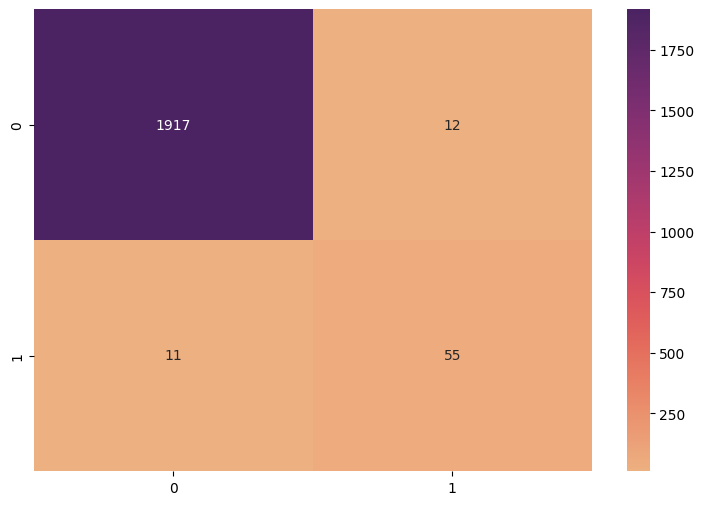

In [ ]:
cm = confusion_matrix(y_test, y_pred_th)
sns.heatmap(cm, annot=True, fmt='d', cmap='flare')
plt.show()

***
**Insight**
***

- Ada 1829 prediksi yang diklasifikasikan dengan benar sebagai kelas 0 (tidak ada kegagalan mesin).
- Terdapat 22 prediksi yang salah diklasifikasikan sebagai kelas 1 (kegagalan mesin), padahal sebenarnya merupakan kelas 0 (tidak ada kegagalan mesin).
- Ada 11 prediksi yang salah diklasifikasikan sebagai kelas 0 (tidak ada kegagalan mesin), padahal sebenarnya merupakan kelas 1 (kegagalan mesin).
- Terdapat 40 prediksi yang diklasifikasikan dengan benar sebagai kelas 1 (kegagalan mesin).

### Classification Report

In [ ]:
print(classification_report(y_test, y_pred_th))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1929
           1       0.82      0.83      0.83        66

    accuracy                           0.99      1995
   macro avg       0.91      0.91      0.91      1995
weighted avg       0.99      0.99      0.99      1995



### ROC Curve

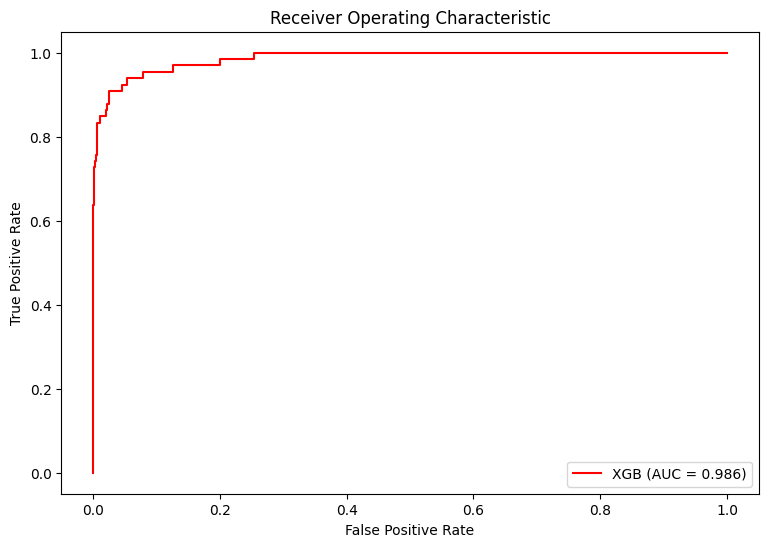

In [ ]:
y_pred_proba = best_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba).round(3)

plt.plot(fpr, tpr, color = 'red', label=f"{model_name} (AUC = {auc:.3f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

### Precision-Recall Curve

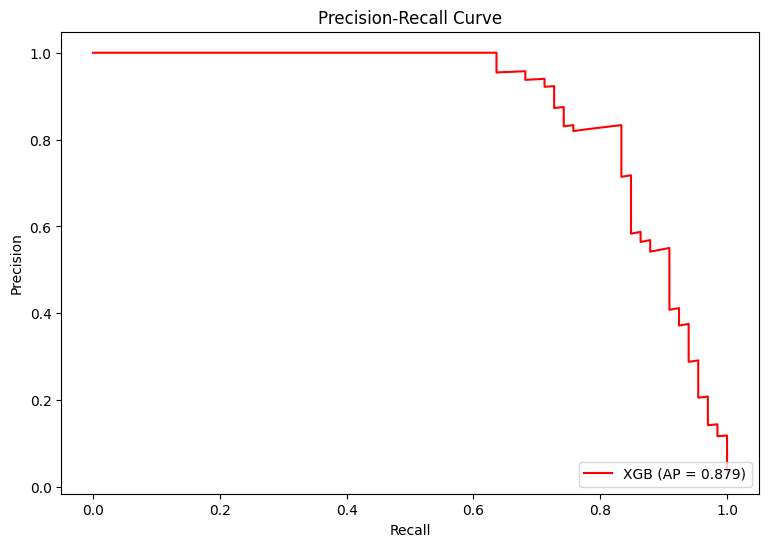

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.plot(recall, precision, color = 'red', label=f"{model_name} (AP = {average_precision:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower right")
plt.show()

***
**Insight**
***

Setelah dilakukan hyperparameter tuning pada model Extreme Gradient Boosting untuk dataset predictive maintenance, terjadi perbaikan dalam kinerja model. Model yang telah di-tune menunjukkan tingkat akurasi yang tinggi, yaitu sebesar 98%. Model ini juga menunjukkan peningkatan dalam mengklasifikasikan kasus positif (kegagalan mesin), dengan precision sebesar 65% dan recall sebesar 78%. Hal ini menandakan bahwa model lebih baik dalam mengenali kasus kegagalan mesin dengan tingkat keakuratan yang lebih tinggi. Model juga memiliki F1-Score sebesar 71% untuk kasus positif, menunjukkan keseimbangan yang baik antara precision dan recall.

***
**Insight**
***

Dengan nilai 0.983, dapat disimpulkan bahwa model yang telah di-tune masih memiliki kemampuan yang baik dalam membedakan antara kasus kegagalan mesin dan tidak ada kegagalan mesin.

### Feature Importances

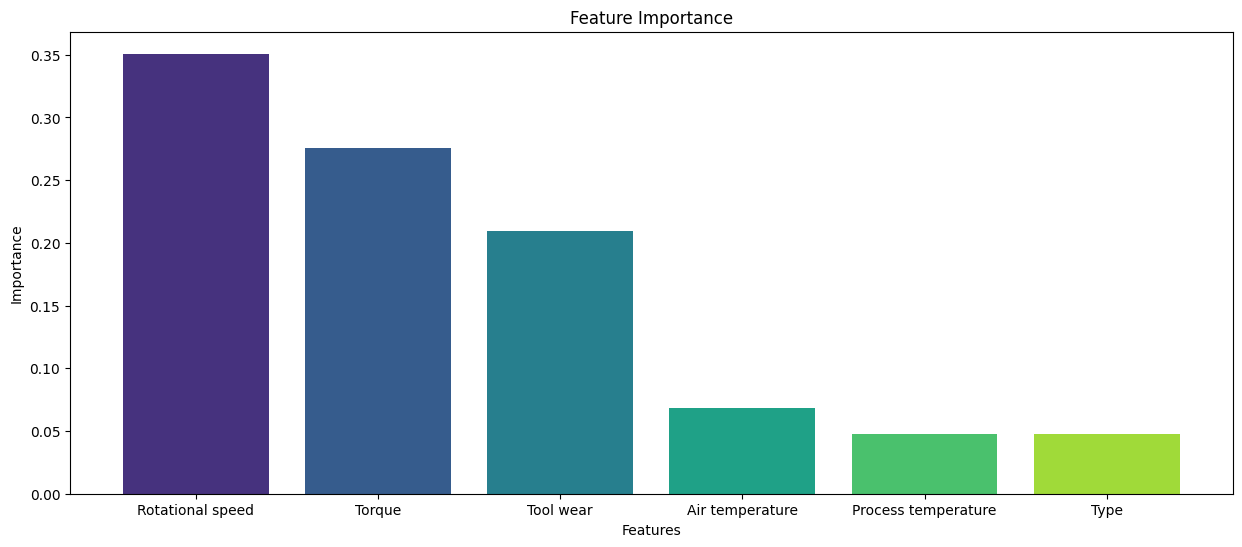

In [ ]:
importance_scores = best_model.feature_importances_
feature_names = X_test.columns

feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance_scores})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

colors = sns.color_palette('viridis')

plt.figure(figsize=(15, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'], color=colors)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=0)
plt.show()